# Tim hiểu open cv



## Chung
OpenCv là thư viện mã nguồn mở cho thị giác máy tính, học máy và xử lí ảnh 
Một số tính năng của OpenCV :
* Đầu vào/đầu ra ảnh/video, xử lý, hiển thị (core, imgproc, highgui):

>core: Cung cấp các hàm cơ bản cho xử lý ma trận, các phép toán số học và các chức năng hỗ trợ cơ bản.
>imgproc: Bao gồm các hàm xử lý hình ảnh như làm mờ, lọc, biến đổi màu sắc và phép biến đổi hình học.
>highgui: Cung cấp các công cụ để nhập và xuất hình ảnh và video, cũng như hiển thị các cửa sổ đồ họa.
* Nhận diện đối tượng/đặc trưng (objdetect, features2d, nonfree):

> objdetect: Bao gồm các thuật toán nhận diện đối tượng, như Cascade Classifier.
>features2d: Cung cấp các thuật toán trích xuất và so khớp đặc trưng (keypoints) trên hình ảnh.
>nonfree: Chưa các thuật toán không thuộc miễn phí màu trắng (non-free), ví dụ như SIFT và SURF.

* Thị giác máy tính dựa trên hình học một mắt hoặc stereo (calib3d, stitching, videostab):

> calib3d: Cung cấp các công cụ cho việc hiệu chỉnh camera, tính toán ma trận chiếu và so khớp hình ảnh stereo.
>stitching: Cho phép ghép nối nhiều ảnh thành ảnh panorama hoặc ảnh panorama 360 độ.
>videostab: Dành cho ổn định hình ảnh trong video để giảm rung và dao động.

* Tính toán trên ảnh (photo, video, superres):

> photo: Cung cấp các công cụ xử lý ảnh như làm mờ, làm nổi bật, cân bằng màu sắc và các hiệu ứng hình ảnh khác.
>video: Bao gồm các công cụ cho xử lý video như theo dõi đối tượng, phân loại và định dạng hình ảnh chuyển động.
>superres: Dùng để tăng cường độ phân giải của hình ảnh hoặc video.

* Học máy & phân nhóm (ml, flann):

> ml: Bao gồm các công cụ học máy để huấn luyện và dự đoán dữ liệu.
>flann: Cung cấp một thư viện hiệu quả cho việc tìm kiếm và so khớp nhanh chóng trong không gian vector.

* Tăng tốc CUDA (gpu):

> gpu: Cho phép sử dụng tính toán song song trên GPU để tăng tốc độ xử lý đặc biệt là trong lĩnh vực thị giác máy tính.

## Basic operation on image

In [61]:

%matplotlib inline
import cv2
from matplotlib import pyplot
import numpy


In [92]:
#reading image

image = cv2.imread("images/img.png")



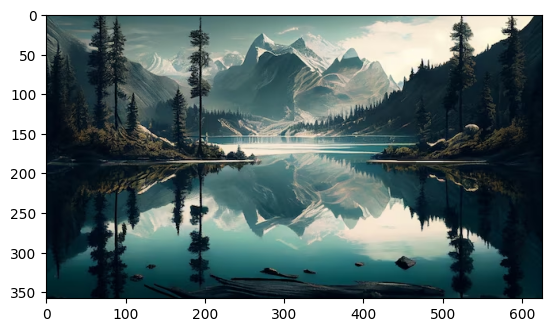

In [77]:
#show image
pyplot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
pyplot.show()

In [75]:
#functiono to show image
def show_image(current_image):
    pyplot.imshow(cv2.cvtColor(current_image, cv2.COLOR_BGR2RGB))
    pyplot.show()

In [78]:
# extract size of image
print(image.shape)
print(image.shape[:2]) # height, width


(358, 626, 3)
(358, 626)


In [79]:
#get RGB value of pixel
[B,G,R] = image[0,0]
print(f"R: {R}, G: {G}, B: {B}")

R: 57, G: 81, B: 83


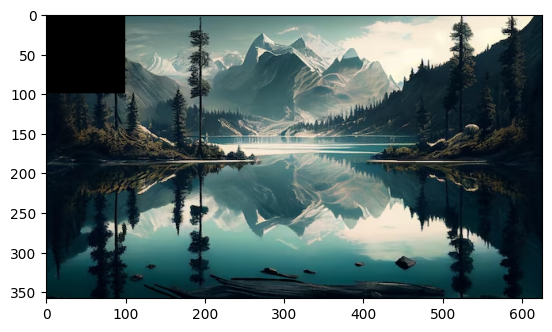

In [89]:
# change pixel value
image2 = image.copy()
for i in range(100):
    for j in range(100):
        image2[i,j] = [0,0,0]

pyplot.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
pyplot.show()


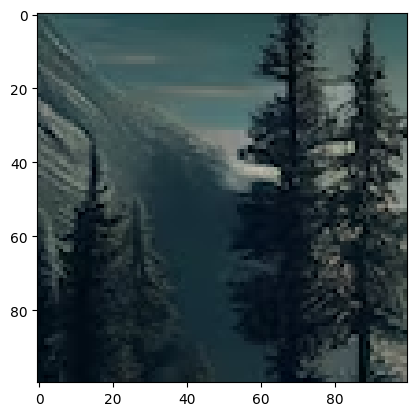

In [93]:
# crop image
crop_image = image[0:100,0:100]
pyplot.imshow(cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB))
pyplot.show()


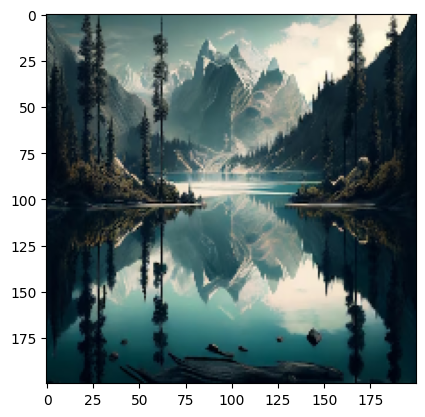

In [94]:
# resize image
resized_image =cv2.resize(image, (200,200))
pyplot.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
pyplot.show()

(179.0, 313.0)
(358, 626)


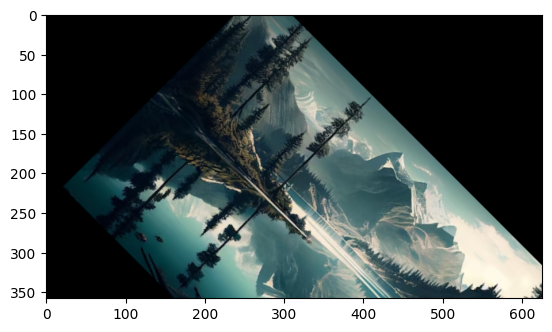

In [114]:
# rotate image
center_point  =tuple(i/2 for i in image.shape[:2])
print(center_point)
print(image.shape[:2])

rotated_image = cv2.warpAffine(image, cv2.getRotationMatrix2D(center_point, -45, 1),(image.shape[1], image.shape[0]))

pyplot.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))


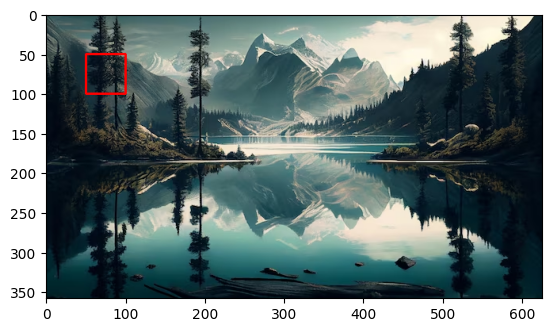

In [118]:
#draw rectangle
image = cv2.imread("images/img.png")
rec = cv2.rectangle(image, (50,50),(100,100),(0,0,255),2)
show_image(rec)


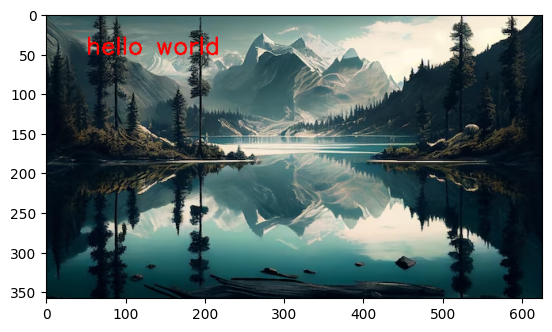

In [117]:
#display text
image = cv2.imread("images/img.png")
text = cv2.putText(image , "hello world", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
show_image(text)

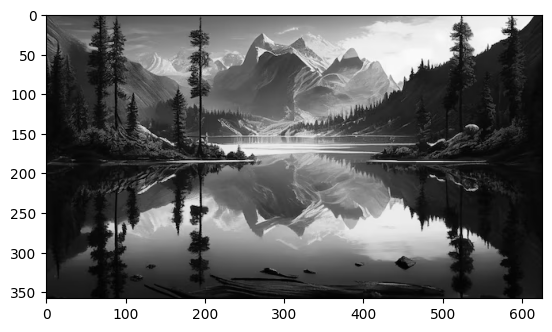

In [119]:
# gray image
image = cv2.imread("images/img.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image)

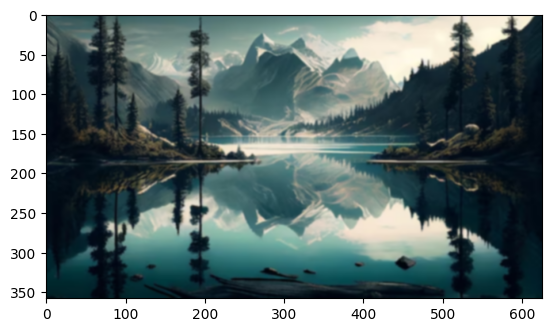

In [120]:
# blur image
image = cv2.imread("images/img.png")
blurred_image = cv2.GaussianBlur(image, (5,5), 0)
show_image(blurred_image)


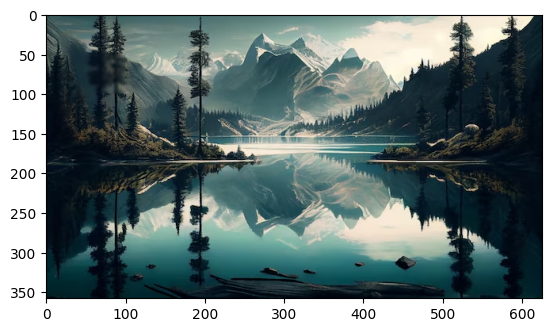

In [125]:
# blur part of image
image = cv2.imread("images/img.png")
image[50:100,50:100] = cv2.GaussianBlur(image[50:100,50:100], (5,5), 1000)
show_image(image)


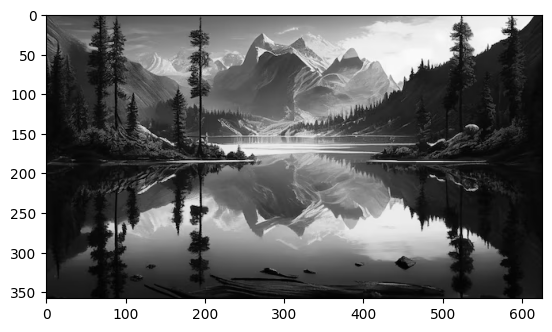

True

In [129]:
#save image
show_image(gray_image)
cv2.imwrite("images/gray_image.png", gray_image)

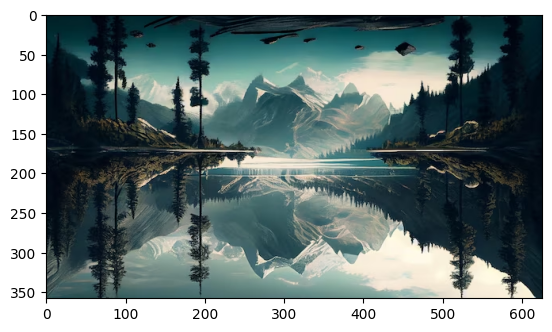

In [136]:
#flip image
image = cv2.imread("images/img.png")
flipped_image = cv2.flip(image, 0)
show_image(flipped_image)

In [140]:
#hsv color
image = cv2.imread("images/img.png")
hsv_image  = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


[[[247   1 230]
  [247   1 230]
  [  1  16 229]
  ...
  [208 131 224]
  [209 121 222]
  [208 116 222]]

 [[234 229 230]
  [237 236 230]
  [238 234 229]
  ...
  [207 127 224]
  [207 127 224]
  [207 127 224]]

 [[248   7 232]
  [244   0 232]
  [228 209 229]
  ...
  [206 131 225]
  [205 127 225]
  [205 127 225]]

 ...

 [[196  44 222]
  [196  44 222]
  [196  44 222]
  ...
  [197  38 221]
  [198  38 219]
  [198  38 219]]

 [[187  41 229]
  [187  41 229]
  [186  40 230]
  ...
  [197  38 221]
  [198  38 219]
  [198  38 219]]

 [[176  14 235]
  [176  14 235]
  [172  12 236]
  ...
  [197  38 221]
  [198  38 219]
  [198  38 219]]]
